In [10]:
# Libraries
import numpy as np
import random
from numpy.random import default_rng
import matplotlib.pyplot as plt
from ete3 import *
#from ete3 import Tree, TreeNode, TreeStyle, NodeStyle, TextFace
import PyQt5
from decimal import Decimal, getcontext
rng = default_rng()
from PIL import Image
import math
from scipy.optimize import curve_fit

# Calculating the Coalescent Times 

In [3]:
def CoalescentTimeCalculator(tree = object):
    # Getting the leaves of the tree
    leaves = tree.get_leaves()
    # A list that will hold the coalescent times
    coalescent_times = []
    # cycling through the leaves and getting all their ancesotrs. Than cycling through their ancestors and calulaiing the distance between ancestor and leaf
    # if the distance is not in coalescent_time than we append it
    ancestors_list = []
    for leaf in leaves:
        ancestors = leaf.get_ancestors()
        for ancestor in ancestors:
            time = ancestor.get_distance(leaf)
            ancestor.add_features(coalescent_time = time)
            if ancestor not in ancestors_list:
                coalescent_times.append(time)
                ancestors_list.append(ancestor)
    coalescent_times.sort()
    
    
    return coalescent_times

def Coalescentparameter(coalescent_times, tree):

    number = len(tree.get_leaves())
    coalescence = coalescent_times.copy()
    # Creating the r parameter for the whole coalesence:
    coalesence_r = list(np.arange(1, len(coalescence)+1))
    coalesence_r.reverse()
    coalescence.insert(0, 0)
    coalesence_r.insert(0, number)

    return coalesence_r, coalescence

In [4]:
Tree_string = "(((((((((PD43974af2:579,PD43974mf:557)100:723,(PD43974jq:1361,PD43974gr2:1348)80:1)100:8,PD43974nl:1409)37:0,(((((((((((((((((PD43974ag2:467,PD43974y2:361)100:43,(PD43974iu:486,((PD43974jz:220,PD43974ns:263)100:279,PD43974nk:410)100:15)100:18)100:12,(PD43974op:441,PD43974pv:473)100:17)100:22,(PD43974lc:488,PD43974fe:562)100:30)100:40,(PD43974fa:451,PD43974cg:472)100:34)100:37,((PD43974jv:613,(PD43974b3:436,PD43974fz:503)100:48)100:24,PD43974ai:501)100:39)100:26,(((PD43974av:427,PD43974iv:551)98:8,PD43974jk:554)100:89,(PD43974ei:566,PD43974i:561)100:19)100:29)100:15,(PD43974ev:594,PD43974ga:595)100:21)100:30,((PD43974et:330,PD43974oo:330)100:262,PD43974pl:570)100:65)100:16,(((((PD43974kq:328,PD43974fi:315)100:98,PD43974ov:512)100:57,PD43974hc:534)100:90,PD43974gg:585)100:29,PD43974kv:676)100:34)100:27,PD43974bw3:568)100:20,(PD43974kh:557,PD43974gs:601)100:97)100:12,((((PD43974ah2:636,((PD43974ik:553,PD43974as2:532)100:93,PD43974fr:544)100:32)100:33,(PD43974ay:666,PD43974mj:672)100:12)100:9,((((((PD43974iw:539,PD43974lf:499)100:50,PD43974jc:572)100:57,((PD43974jr:531,PD43974eg2:507)100:56,PD43974ie:541)100:6)100:47,PD43974es2:657)100:20,((((PD43974t:598,PD43974co2:609)100:9,PD43974pm:591)100:17,PD43974ph:617)100:54,PD43974gv:632)100:13)100:11,((PD43974ez:654,(((PD43974ng:640,PD43974bv:459)100:77,PD43974ct2:644)100:1,PD43974ou:546)100:7)100:15,PD43974fj:572)100:13)100:27)100:17,(((((((((PD43974ap2:405,PD43974cf2:448)100:188,(PD43974kc:537,((PD43974kt:348,PD43974hd:378)100:66,PD43974mm:410)100:170)100:23)100:40,(PD43974kx:620,PD43974ce:420)100:67)100:23,PD43974eu2:659)100:11,PD43974la:669)100:13,(((((PD43974en:566,((PD43974az:493,PD43974eo:469)100:19,PD43974gc2:574)100:32)100:42,PD43974fb:558)100:44,((((PD43974ii:424,PD43974k:515)100:66,(PD43974jh:334,PD43974f2:416)100:108)100:137,(PD43974bd:490,PD43974ho:545)100:109)100:5,PD43974ck2:628)100:17)100:14,PD43974bf:645)100:14,(PD43974lh:623,PD43974bp2:690)100:9)100:11)100:7,(((PD43974ot:453,PD43974cp:446)100:162,PD43974e:527)100:49,PD43974bt:610)100:17)100:12,PD43974ey:641)100:25,(((PD43974ih:568,PD43974gh:523)100:129,(((PD43974kb:149,PD43974gf:153)100:522,PD43974em2:569)100:17,(((PD43974ke:243,PD43974l:324)100:187,(PD43974ox:525,PD43974bn:531)100:14)100:20,PD43974id:562)100:32)100:20)100:61,((PD43974kf:328,PD43974pt:476)100:176,PD43974hl:590)100:29)100:23)100:13)100:14)100:78,((PD43974ep:635,(PD43974bm2:709,PD43974ps:677)100:35)100:24,(((PD43974jm:488,PD43974ks:576)100:9,PD43974pu:629)100:19,(PD43974ll:476,(PD43974lt:558,(PD43974pf:503,PD43974ed:509)100:49)100:23)100:65)100:73)100:64)100:557,((((PD43974aj2:903,((PD43974ij:489,PD43974aq:524)100:43,PD43974bu:525)100:318)100:15,PD43974gl:960)100:67,(PD43974or:708,PD43974eh:911)100:28)100:101,(PD43974os:650,(PD43974if:478,PD43974gi:509)100:289)100:346)100:498)99:3,(((((PD43974hu:756,PD43974jl:823)100:765,(PD43974au:728,PD43974er:836)100:592)99:1,(((PD43974io:562,PD43974n2:536)78:5,(PD43974mq:502,PD43974fs2:493)100:26)100:893,(((PD43974je:740,PD43974pp:862)100:43,(PD43974jw:527,(PD43974om:654,((((PD43974ls:449,PD43974hf:603)100:112,PD43974u2:625)100:30,PD43974hp:672)100:78,PD43974gq:761)100:11)100:37)100:37)100:601,(((PD43974ml:357,PD43974bg2:331)100:420,(PD43974ft2:755,PD43974hq:713)100:48)100:61,(PD43974pn:853,PD43974ht:869)100:19)100:549)17:0)11:0)99:2,(((PD43974it:878,PD43974hi:847)100:545,PD43974jb:1348)100:1,PD43974py:1477)99:4)9:0,PD43974pi:1278)20:0)100:11,(((((PD43974hv:1479,PD43974lr:1146)52:1,(PD43974nj:1169,PD43974hz:1549)18:0)91:2,(PD43974nq:1192,PD43974ej:1374)100:3)26:0,((((PD43974ak:1191,PD43974be2:1140)49:0,PD43974mk:1382)4:0,PD43974pk:1180)18:1,PD43974js:1338)67:1)73:1,((PD43974z:1360,PD43974bo:1278)98:3,PD43974hb2:1255)73:1)100:6)99:2)97:1,PD43974fc:1192)100:5,((((PD43974am2:1465,PD43974fp:1395)100:7,PD43974hj:1226)99:2,(PD43974fw:1571,PD43974o2:1118)98:1)99:8,(((PD43974hw:1273,((PD43974ow:683,(PD43974ff:579,PD43974gp:577)100:50)100:138,(PD43974pq:685,PD43974s2:745)100:267)100:495)100:1,(PD43974oy:1351,PD43974ge:1310)100:2)100:6,PD43974bq:1116)98:1)99:5)27:0,((PD43974in:1627,((PD43974jg:1445,PD43974m:1294)100:8,((PD43974kz:1520,PD43974fm:1324)100:5,PD43974hn:1198)100:16)19:0)13:0,(PD43974cl2:1267,PD43974gd:1340)100:5)95:1)99:2,(((((((((PD43974al2:636,PD43974fd:644)99:14,PD43974q2:744)100:745,PD43974lu:1147)99:7,(PD43974ku:1132,(PD43974ax2:1356,PD43974c:1158)39:0)99:4)100:13,(PD43974w:1467,PD43974ia:1225)100:15)97:1,(((((PD43974an2:895,(PD43974jo:902,PD43974ch2:1065)100:69)100:443,PD43974cd2:1311)78:0,(PD43974jf:1359,PD43974ha2:1308)49:0)99:4,(PD43974ip:1508,PD43974fv:1444)100:6)100:6,((PD43974bb:1201,PD43974cr2:1186)100:4,PD43974bl:1516)100:6)83:3)26:0,(((((PD43974kg:480,PD43974cn:728)94:18,(PD43974lb:736,PD43974gt:684)100:90)100:658,PD43974px:1510)100:4,((PD43974lz:1257,PD43974hh:1425)100:5,PD43974gw:1221)100:7)99:5,(PD43974kj:907,PD43974no:1378)100:9)99:3)18:0,((((((((PD43974ar2:987,(PD43974ld:917,PD43974fy2:1043)100:22)100:493,((PD43974is:848,PD43974lm:742)100:24,(PD43974cj:590,PD43974gj:766)100:40)100:668)100:2,(PD43974lv:1290,(((PD43974bk2:950,(PD43974gb:822,PD43974j:822)100:58)100:107,PD43974cc2:958)100:34,PD43974pj:891)100:525)100:2)99:2,((((PD43974ji:596,PD43974by2:626)100:32,(PD43974ju:598,PD43974po:542)100:85)100:11,(PD43974fg:348,PD43974gx2:476)100:209)100:142,(PD43974jp:703,PD43974lk:722)100:69)100:755)99:2,((((((PD43974hx:643,PD43974hr:575)100:54,(PD43974aw2:669,PD43974pg:544)100:8)100:37,(((PD43974km:128,PD43974go:102)100:583,PD43974ae:562)100:14,PD43974pe:523)100:75)100:28,PD43974cs:579)100:701,PD43974ci:1430)100:7,PD43974cq2:983)100:0)100:3,PD43974il:1441)100:3,(PD43974jy:1428,PD43974h:1203)100:10)100:4,((((PD43974eq:929,PD43974bi:773)100:497,PD43974lj:1491)100:6,(PD43974fk:934,PD43974gz2:990)100:402)29:0,PD43974pb:1264)100:14)16:0)68:2,(PD43974v:1327,(PD43974mn:1295,PD43974cb2:1156)92:6)100:16)100:3)100:17,((((((PD43974ao2:1225,(((PD43974im:934,((PD43974ir:905,PD43974kd:972)100:35,PD43974fn:1001)100:17)100:550,PD43974kn:1371)98:1,(((PD43974iz:748,(PD43974qa:760,PD43974ac2:530)100:64)100:40,(PD43974mp:788,(PD43974pw:760,PD43974ib:664)100:49)100:24)100:634,((PD43974lw:1248,PD43974fx:1570)100:2,(PD43974md:856,PD43974pd:1277)100:6)99:1)99:2)99:2)100:7,(PD43974iq:1422,((PD43974jt:1372,PD43974fu:1409)100:13,(PD43974mz:1376,PD43974ab2:1038)100:2)100:2)100:7)100:6,(PD43974ef:1377,PD43974fq2:1330)100:7)100:7,(PD43974mu:1537,PD43974gy:1441)100:14)100:4,(((((PD43974bc:698,PD43974p:891)100:13,PD43974bj:697)100:642,((((PD43974iy:1389,PD43974jn:1342)41:0,((PD43974bs:1067,PD43974bz:1270)20:0,PD43974cm3:1158)46:0)41:1,PD43974hy:1364)36:0,PD43974jd:1457)84:3)100:5,(((((PD43974jj:1462,PD43974el:1418)100:0,PD43974hm:1349)100:4,PD43974lg:1244)100:10,(PD43974ew:1459,(PD43974fo:1377,PD43974r2:1229)22:0)100:11)15:0,(PD43974on:1431,PD43974hs:1369)100:8)5:0)12:0,((PD43974ix:1360,PD43974fh:1226)90:3,((PD43974bx2:947,PD43974he:993)100:23,PD43974gu:991)100:498)98:2)100:4)100:3,((((PD43974at:1532,PD43974ko:1524)100:7,((PD43974ok:1381,PD43974ig:1525)100:1,PD43974hg2:1372)100:6)99:1,PD43974ja:1389)100:3,(PD43974ad:1223,((((PD43974ee:1566,(PD43974br:1379,PD43974g2:1400)83:0)33:1,PD43974ex:1474)100:7,PD43974mv:1353)100:3,PD43974ic:1228)100:4)99:1)100:8)100:7);"

In [5]:
tree = Tree(Tree_string)
coalescent_times = CoalescentTimeCalculator(tree)
coalescent_r, coalescence = Coalescentparameter(coalescent_times, tree)

In [18]:
coalescent_r[0]

328

Text(0, 0.5, 'Remaining lineages')

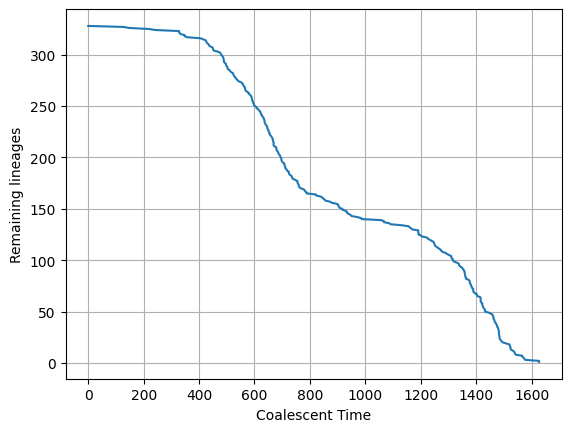

In [9]:
plt.plot(coalescence, coalescent_r)
plt.grid()
plt.xlabel("Coalescent Time")
plt.ylabel("Remaining lineages")
#plt.xscale("log")
#plt.yscale("log")

In [45]:
def func(T, N1, n1, r1, n2, N2, r2):
    nominator1 = n1
    denominator1 = (r1*n1*T)/(2*N1)+1
    #n2 = 183-n1
    nominator2 = n2
    denominator2 = (r2*n2*T)/(2*N2)+1
    return nominator1/denominator1 + nominator2/denominator2

In [49]:
def RemainingLines(T, N, n, r):
    
    nominator = n
    denominator = (r*n*T)/(2*N)+1
    value = nominator/denominator
    return value

In [46]:
popt, pcov = curve_fit(func, coalescence, coalescent_r)
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

[-1.34187225e+04  2.23118436e+02 -3.80310397e-01  3.93433703e+02
 -1.38790680e+04 -2.23071409e-01]
[3.27710491e+10 4.96181748e+08 6.92537313e+05 4.96181746e+08
 2.33117845e+10 3.51619606e+05]


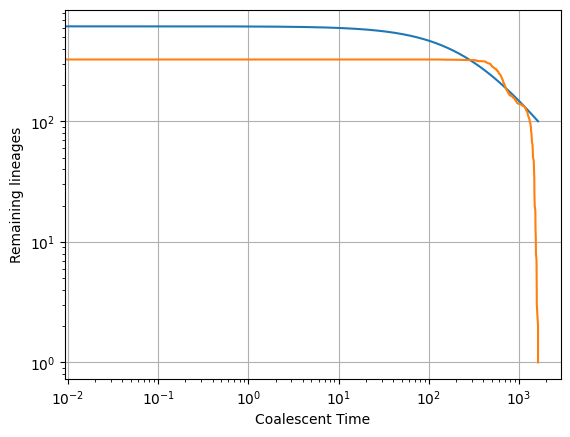

In [59]:
time = np.linspace(0, coalescence[-1], 100000)
plt.plot(time, func(time, *popt))
plt.plot(coalescence, coalescent_r)
plt.grid()
plt.xlabel("Coalescent Time")
plt.ylabel("Remaining lineages")
plt.xscale("log")
plt.yscale("log")